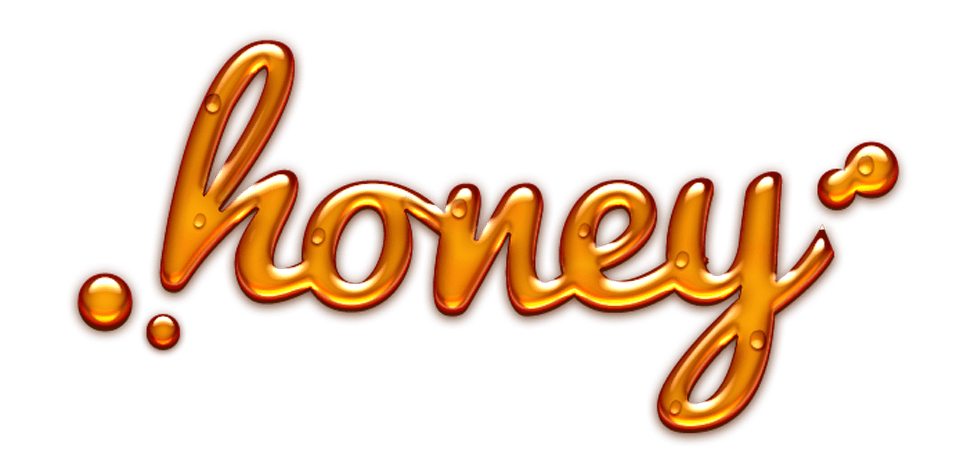

In [34]:
from IPython.display import Image
Image("honeyy.png")

In [84]:
import numpy as np
import pandas as ps
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz 

In [85]:
df = ps.read_csv('honeyproduction.csv')
df["totalproduction"]=df["totalprod"]
df=df.drop(["totalprod"],axis=1)
df.head()

,state,numcol,yieldpercol,stocks,priceperlb,prodvalue,year,totalproduction
0,AL,16000.0,71,159000.0,0.72,818000.0,1998,1136000.0
1,AZ,55000.0,60,1485000.0,0.64,2112000.0,1998,3300000.0
2,AR,53000.0,65,1688000.0,0.59,2033000.0,1998,3445000.0
3,CA,450000.0,83,12326000.0,0.62,23157000.0,1998,37350000.0
4,CO,27000.0,72,1594000.0,0.70,1361000.0,1998,1944000.0


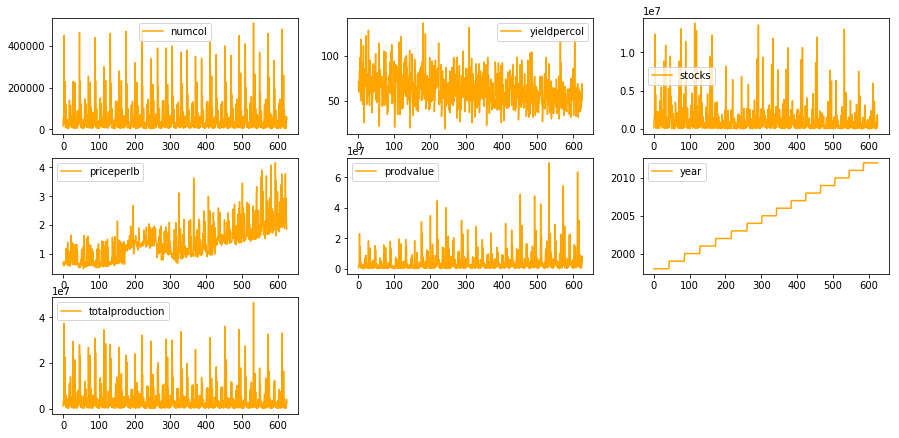

In [86]:
df.plot(subplots=True, layout=(6,3), figsize=(15, 15), sharex=False,color="orange");

In [87]:
gb=df.groupby("state").mean()
gb

,numcol,yieldpercol,stocks,priceperlb,prodvalue,year,totalproduction
state,,,,,,,
AL,11933.333333,67.533333,1.588000e+05,1.418667,1.001933e+06,2005.0,8.254667e+05
AR,36800.000000,73.933333,9.926667e+05,1.092000,2.684400e+06,2005.0,2.810400e+06
AZ,33666.666667,60.066667,8.770000e+05,1.134667,2.111800e+06,2005.0,2.032267e+06
CA,406666.666667,55.800000,6.453800e+06,1.133333,2.435933e+07,2005.0,2.316900e+07
CO,28000.000000,62.800000,8.152667e+05,1.229333,2.090267e+06,2005.0,1.750600e+06
FL,195200.000000,83.066667,2.209600e+06,1.100667,1.661527e+07,2005.0,1.646987e+07
GA,60400.000000,54.666667,3.522667e+05,1.185333,3.867533e+06,2005.0,3.299933e+06
HI,8733.333333,98.000000,1.702000e+05,1.710000,1.404200e+06,2005.0,8.431333e+05
IA,31466.666667,65.733333,1.129933e+06,1.320667,2.588333e+06,2005.0,2.080000e+06


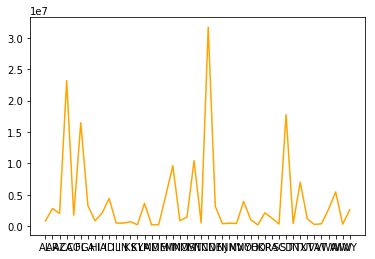

In [88]:
plt.plot(gb["totalproduction"],color="orange")

In [96]:
lb = LabelEncoder()
df["state"] = lb.fit_transform(df["state"])
df.head()

,state,numcol,yieldpercol,stocks,priceperlb,prodvalue,year,totalproduction
0,0,16000.0,71,159000.0,0.72,818000.0,1998,1136000.0
1,2,55000.0,60,1485000.0,0.64,2112000.0,1998,3300000.0
2,1,53000.0,65,1688000.0,0.59,2033000.0,1998,3445000.0
3,3,450000.0,83,12326000.0,0.62,23157000.0,1998,37350000.0
4,4,27000.0,72,1594000.0,0.70,1361000.0,1998,1944000.0


# Linear regression

In [90]:
X=df[["state","numcol","yieldpercol","stocks","prodvalue","priceperlb","year"]]
y=df["totalproduction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

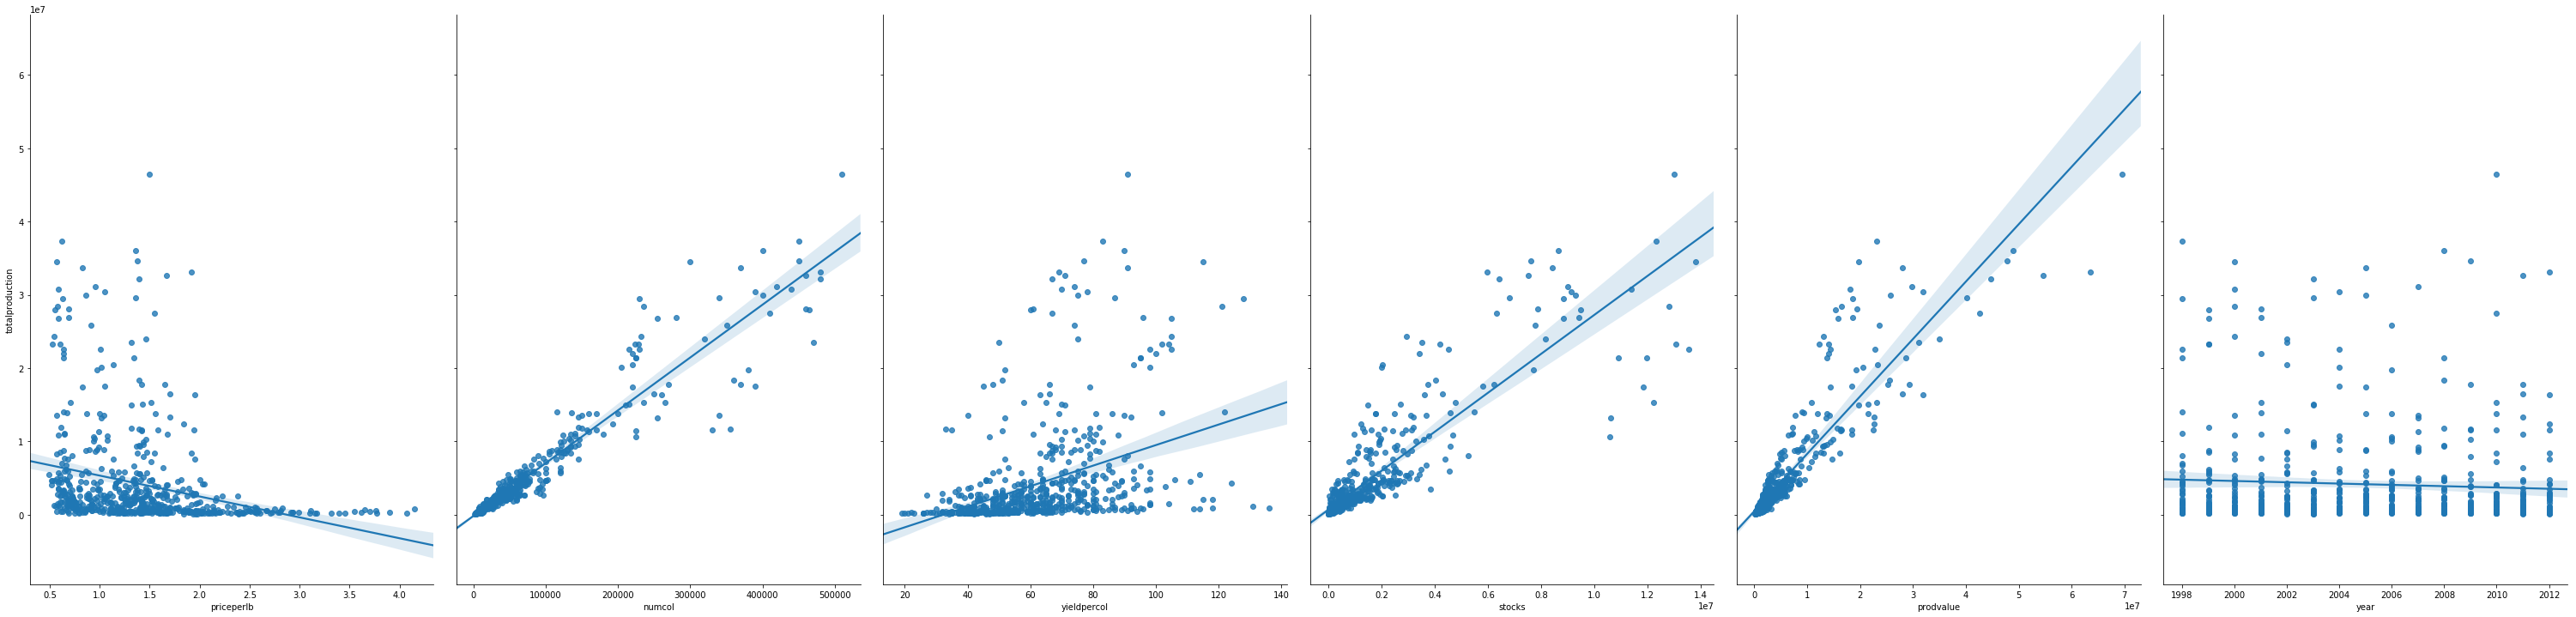

In [91]:
sns.pairplot(df, x_vars=['priceperlb','numcol','yieldpercol','stocks','prodvalue','year'], y_vars='totalproduction', size=10, aspect=0.7, kind='reg')

In [92]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:",mean_absolute_error(y_test, y_pred))
print("the regular average of the total production:",df["totalproduction"].mean())

MSE: 1616204839388.2913
RMSE: 1271300.4520522642
MAE: 796236.5975037017
the regular average of the total production: 4169086.2619808307


# Decision tree regressor

In [93]:
X=df[["state","numcol","yieldpercol","stocks","priceperlb","prodvalue"]]
y=df["totalproduction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [94]:
regressor = DecisionTreeRegressor(random_state=0,criterion="mse",max_depth=7)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

regressor = DecisionTreeRegressor(random_state=0,criterion="mae")
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print("MAE:",mean_absolute_error(y_test, y_pred))

print("the regular average of the total production:",df["totalproduction"].mean())

MSE: 4265228142134.3247
RMSE: 2065242.8772748073
MAE: 625143.6170212766
the regular average of the total production: 4169086.2619808307
